Análise de Dados

# **Conjunto de dados de vendas de josgos de PS4** <p>
Dados de vendas e classificações de jogos do playstation 4 de 2013 a 2018, extraídos do VzCharts

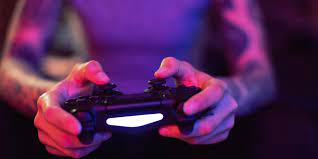

In [74]:
# Importando as Libs:
import pandas as pd
import numpy as np

# Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [75]:
# Lendo os dados:
Base_dados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

# Verificando os dados:
Base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [76]:
# Renomeando as colunas para Pt-BR
Base_dados.rename(columns={
    'Game': 'Jogo',
    'Year': 'Ano',
    'Genre': 'Genero',
    'Publisher': 'Produtora',
    'North America': 'America do Norte',
    'Europe': 'Europa',
    'Japan': 'Japão',
    'Rest of World': 'Resto do Mundo',
    'Global': 'Global'
}, inplace=True)

In [77]:
Base_dados.shape

(1034, 9)

In [78]:
Base_dados.isnull().sum()

,0
Jogo,0
Ano,209
Genero,0
Produtora,209
America do Norte,0
Europa,0
Japão,0
Resto do Mundo,0
Global,0


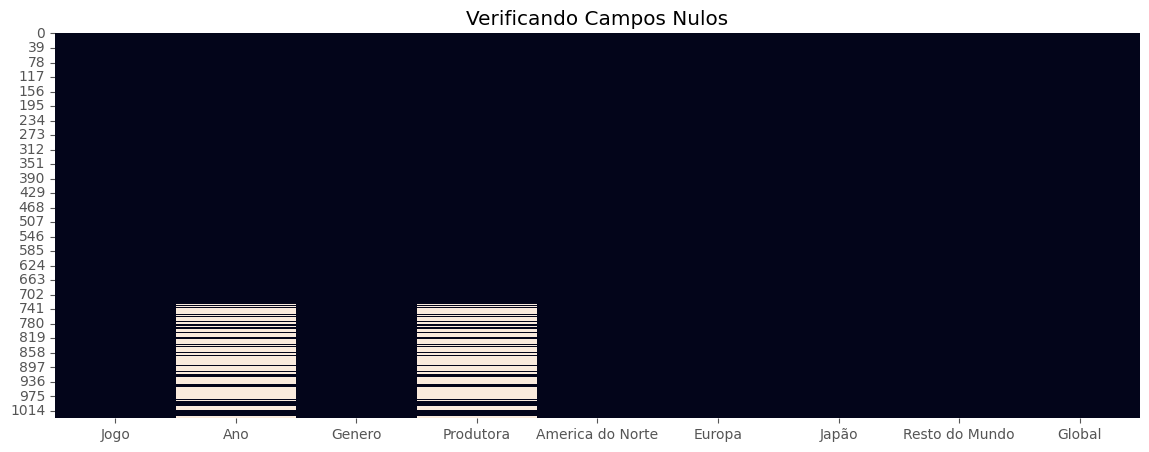

In [79]:
# Indormação Gráfica Nulos
plt.figure(figsize=(14,5))
plt.title('Verificando Campos Nulos')
sns.heatmap(Base_dados.isnull(), cbar=False);

In [80]:
# Removendo valores faltantes
Base_dados.dropna(inplace=True)

In [81]:
# Visualização Estatística
Base_dados.describe()

,Ano,America do Norte,Europa,Japão,Resto do Mundo,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


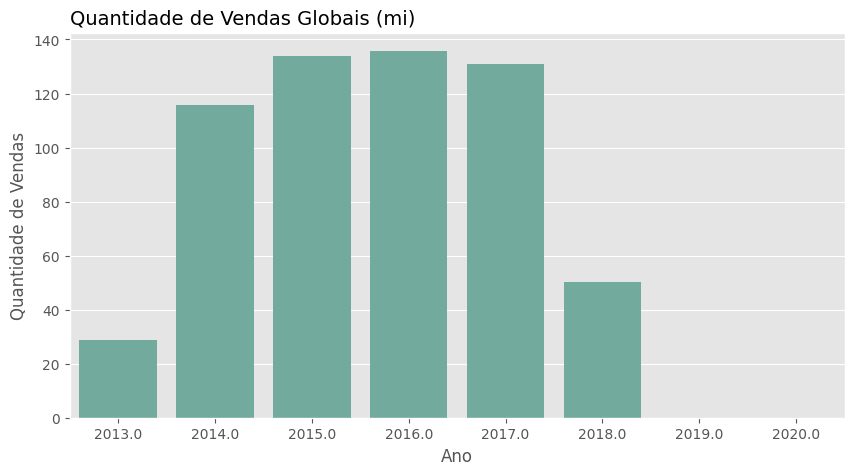

In [82]:
# Visualização Gráfica (Ano x Vendas Global)

# Tamanho
plt.figure(figsize=(10,5))

# titulo
plt.title('Quantidade de Vendas Globais (mi)',loc='left', fontsize=14)

# Label
plt.ylabel('Quantidade de Vendas')

# Gráfico
sns.barplot(x=Base_dados['Ano'], y=Base_dados['Global'], color='#69b3a2', ci=None, estimator=sum);

In [83]:
# Retirar os anos sem dados
Base_dados = Base_dados.loc[ (Base_dados['Ano'] != 2019) & (Base_dados['Ano'] != 2020)]

# Verificar
Base_dados.head()

,Jogo,Ano,Genero,Produtora,America do Norte,Europa,Japão,Resto do Mundo,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


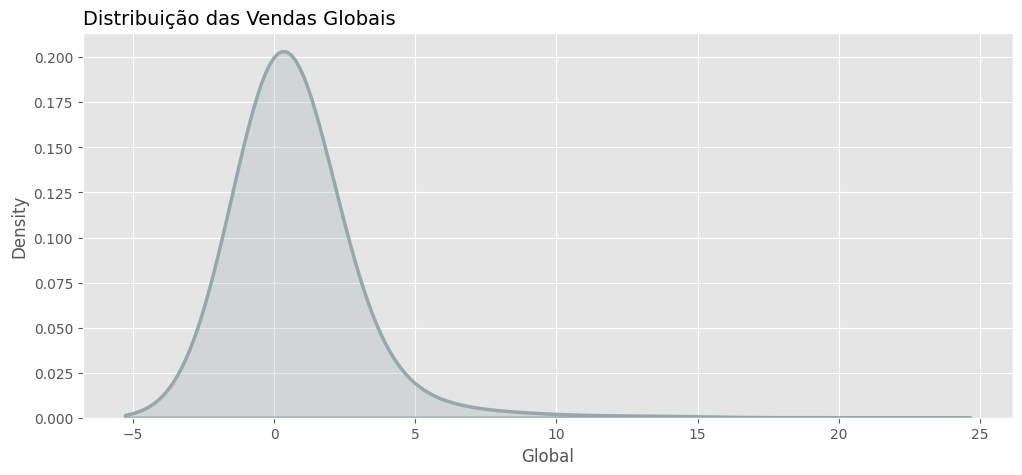

In [84]:
# Tamanho
plt.figure( figsize=(12, 5) )

# Estilo
plt.style.use('ggplot')

# titulo
plt.title('Distribuição das Vendas Globais', loc='left', fontsize=14 )

# Plot
sns.kdeplot( Base_dados['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5 );

In [85]:
Analise = Base_dados.groupby( by=['Ano'] ).sum().reset_index()
Analise

,Ano,Jogo,Genero,Produtora,America do Norte,Europa,Japão,Resto do Mundo,Global
0,2013.0,Call of Duty: GhostsBattlefield 4FIFA Soccer 1...,ShooterShooterSportsAction-AdventureShooterRac...,ActivisionElectronic ArtsEA SportsUbisoftSony ...,10.35,12.88,0.97,4.57,28.76
1,2014.0,Grand Theft Auto VCall of Duty: Advanced Warfa...,ActionShooterAction-AdventureMiscSportsShooter...,Rockstar GamesActivisionSony Computer Entertai...,39.80,54.12,3.58,18.29,115.85
2,2015.0,Call of Duty: Black Ops 3Fallout 4FIFA 16Star ...,ShooterRole-PlayingSportsShooterActionRole-Pla...,ActivisionBethesda SoftworksEA SportsElectroni...,49.60,56.21,7.28,20.88,133.99
3,2016.0,FIFA 17Uncharted (PS4)Call of Duty: Infinite W...,SportsActionShooterShooterRole-PlayingShooterS...,Electronic ArtsSony Interactive EntertainmentA...,47.40,57.98,9.65,20.71,135.72
4,2017.0,Call of Duty: WWIIFIFA 18Horizon: Zero DawnCra...,ShooterSportsActionPlatformShooterShooterActio...,ActivisionEA SportsSony Interactive Entertainm...,44.77,57.18,9.08,19.89,130.90
5,2018.0,Red Dead Redemption 2Spider-Man (PS4)God of Wa...,Action-AdventureAction-AdventureActionActionAc...,Rockstar GamesSony Interactive EntertainmentSo...,19.65,18.70,4.13,7.69,50.20


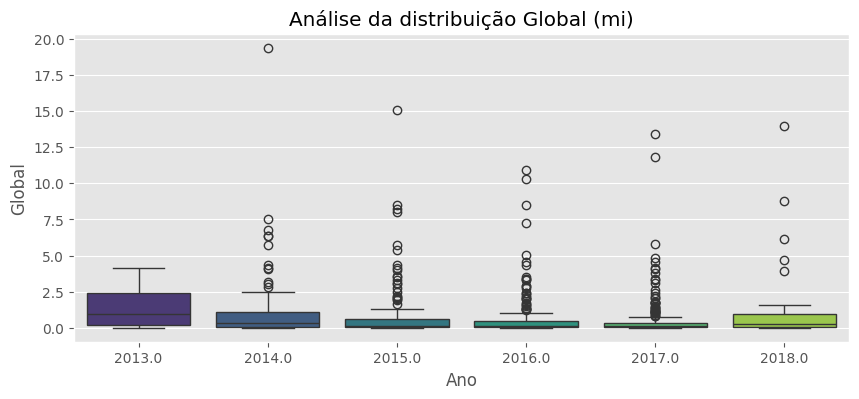

In [86]:
# Tamanho
plt.figure( figsize=(10, 4) )

# titulo
plt.title('Análise da distribuição Global (mi)')

# Plot
sns.boxplot( data=Base_dados, x='Ano', y='Global', palette='viridis') ;

In [87]:
# Verificação dos Jogos que venderam mais de 10 Milhoões de Exemplares
Base_dados.loc[Base_dados['Global'] >= 10]

,Jogo,Ano,Genero,Produtora,America do Norte,Europa,Japão,Resto do Mundo,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [88]:
# Analisando a proporção dos 100% de cada continemente comparado ao Total
Analise = Base_dados.groupby( by=['Ano'] ).sum().reset_index()

America = [America / Total * 100 for America, Total in zip(Analise['America do Norte'], Analise['Global'])]
Europa = [Europa / Total * 100 for Europa, Total in zip(Analise['Europa'], Analise['Global'])]
Japão = [Japão / Total * 100 for Japão, Total in zip(Analise['Japão'], Analise['Global'])]
Resto_Mundo = [Resto_Mundo / Total * 100 for Resto_Mundo, Total in zip(Analise['Resto do Mundo'], Analise['Global'])]

America, Europa, Japão, Resto_Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

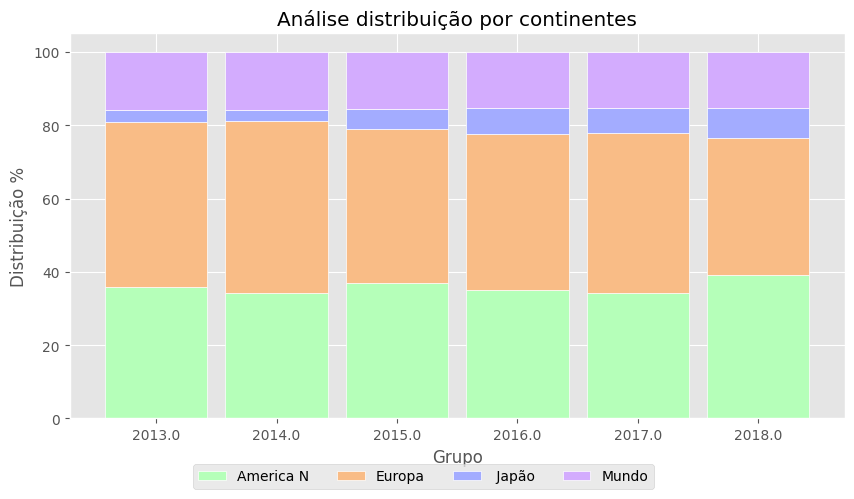

In [89]:
# Tamanho
plt.figure( figsize=(10, 5) )

# Largura barra no gráfico
Largura_Barra = 0.85
Rotulos = Analise['Ano']
Grupos = [0, 1, 2, 3, 4, 5]

# titulo
plt.title('Análise distribuição por continentes')

# Plot da America
plt.bar( Grupos, America, width=Largura_Barra, color='#b5ffb9', edgecolor='white' )

# Plot da Europa
plt.bar( Grupos, Europa, bottom=America, width=Largura_Barra, color='#f9bc86', edgecolor='white' )

# Plot do Japao
plt.bar( Grupos, Japão, bottom=[ A + B for A, B in zip(America, Europa) ], width=Largura_Barra, color='#a3acff', edgecolor='white' )

# Plot do Resto do mundo
plt.bar( Grupos, Resto_Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japão) ], width=Largura_Barra, color='#d3acfe', edgecolor='white' )

# Labels
plt.xticks( Grupos, Rotulos )
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

# Legenda
plt.legend( ['America N', 'Europa',' Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4 );

In [90]:
Base_dados['Produtora'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [91]:
from sklearn.preprocessing import LabelEncoder
Funcao_Label = LabelEncoder()

Base_dados['Prod'] = Funcao_Label.fit_transform( Base_dados['Produtora'] )
Base_dados['Gen'] = Funcao_Label.fit_transform( Base_dados['Genero'] )
Base_dados['Game'] = Funcao_Label.fit_transform( Base_dados['Jogo'] )

Base_dados.head()

,Jogo,Ano,Genero,Produtora,America do Norte,Europa,Japão,Resto do Mundo,Global,Prod,Gen,Game
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [92]:
Paleta_Cores = sns.color_palette('husl', 8)
Paleta_Cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

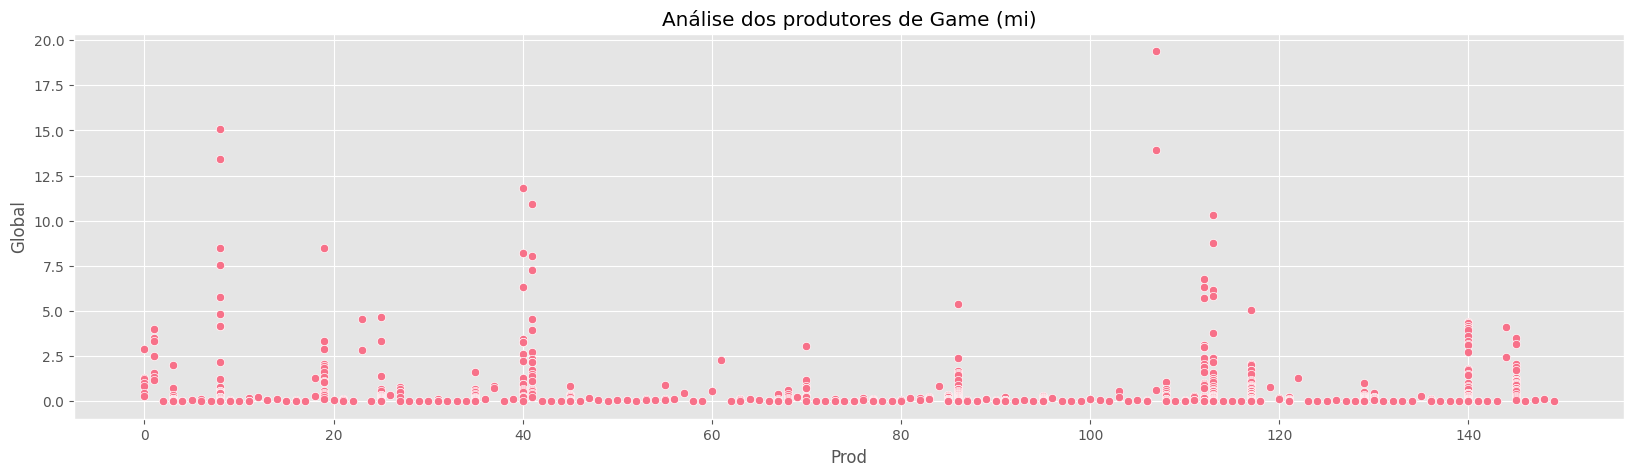

In [94]:
plt.figure( figsize=(20,5))
plt.title('Análise dos produtores de Game (mi)')
sns.scatterplot(data=Base_dados, x='Prod', y='Global', color=Paleta_Cores[0] );

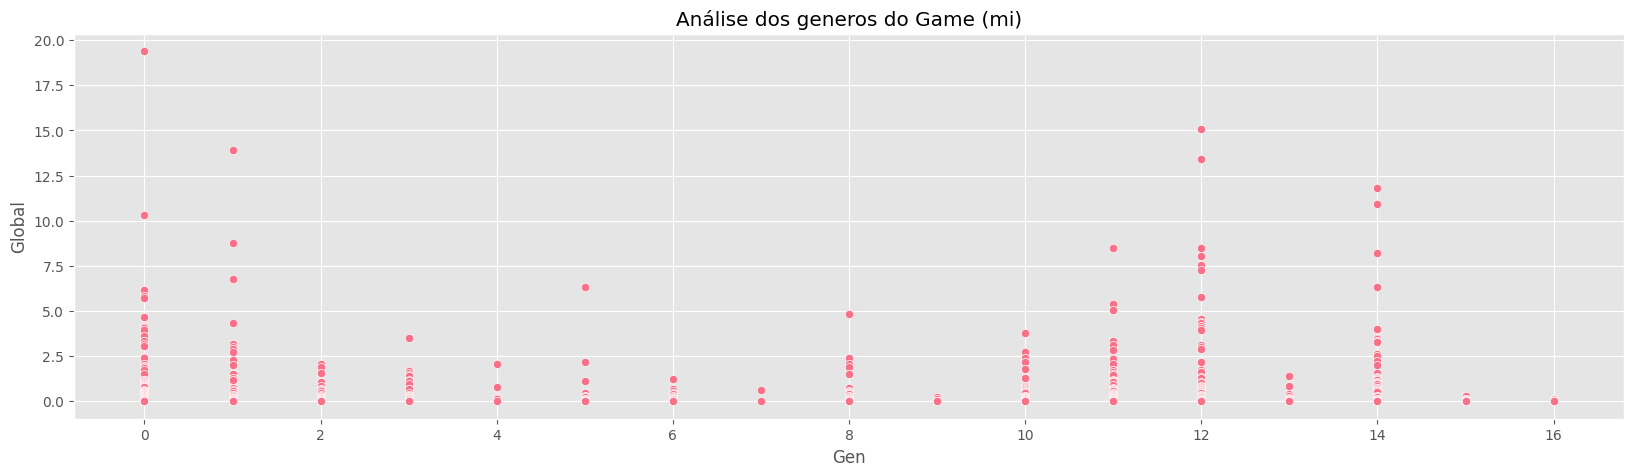

In [95]:
plt.figure( figsize=(20,5))
plt.title('Análise dos generos do Game (mi)')
sns.scatterplot(data=Base_dados, x='Gen', y='Global', color=Paleta_Cores[0] );

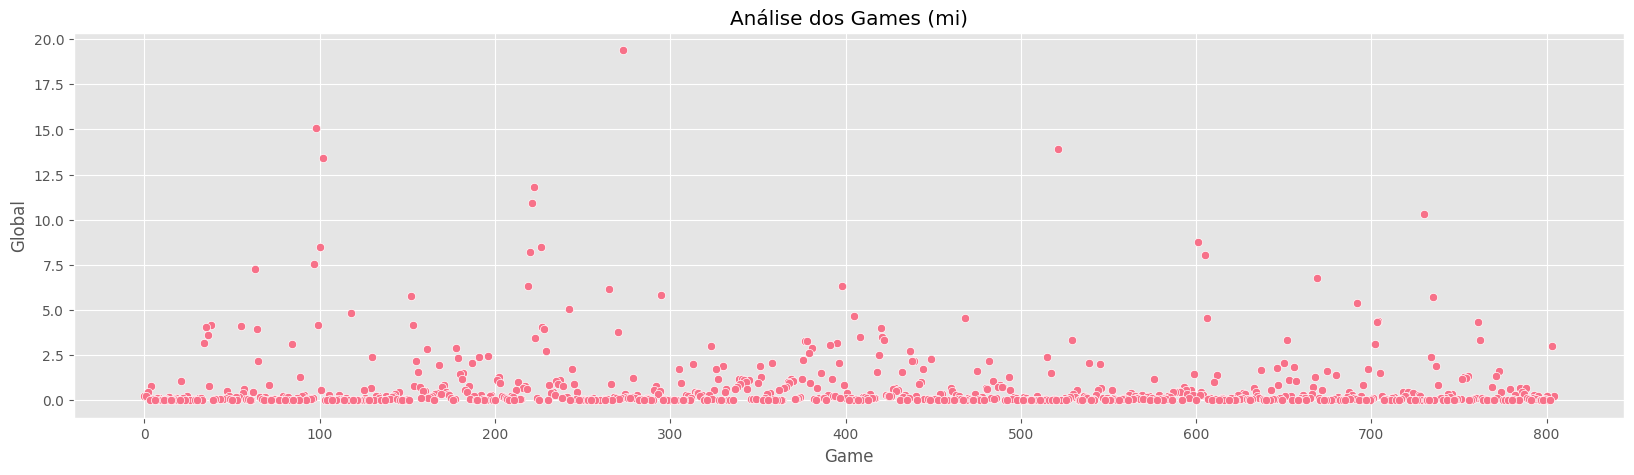

In [97]:
plt.figure( figsize=(20,5))
plt.title('Análise dos Games (mi)')
sns.scatterplot(data=Base_dados, x='Game', y='Global', color=Paleta_Cores[0] );

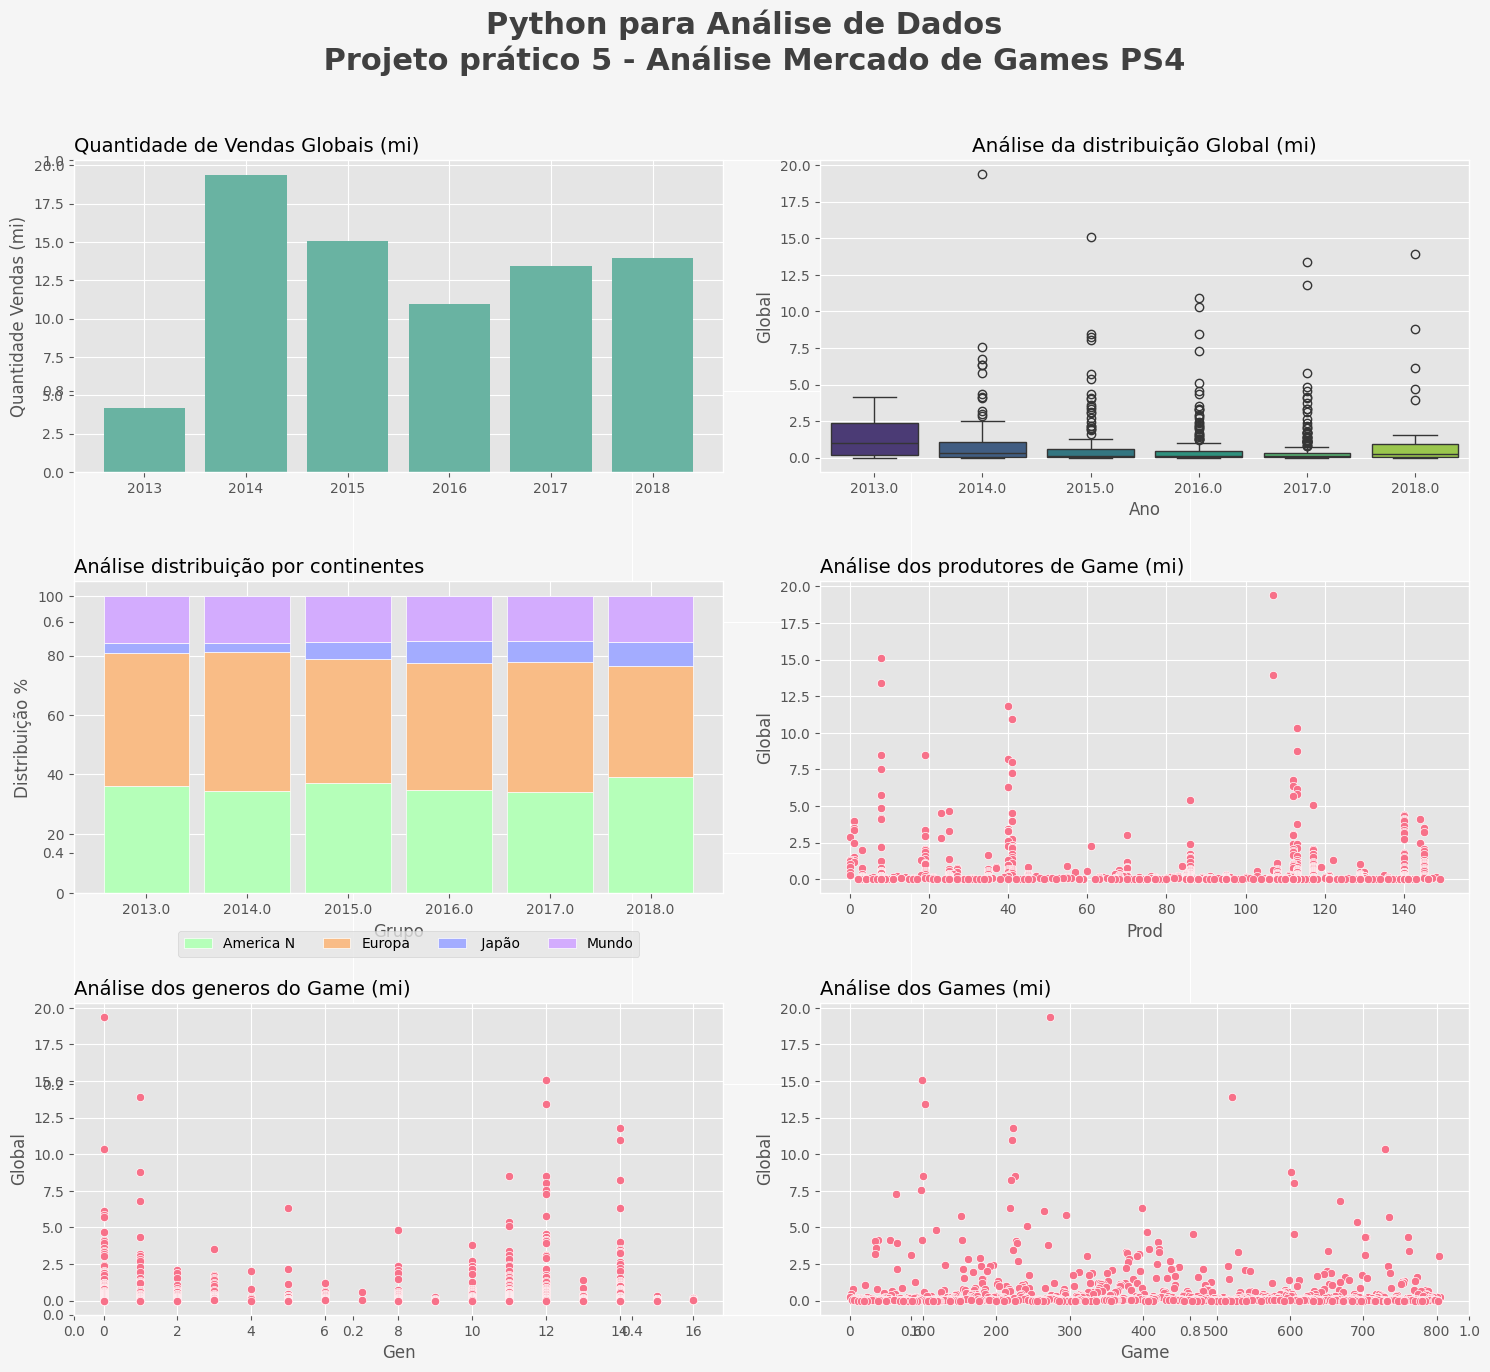

In [106]:
# Relatorio --> Report para o Chefe

# Tamanho da Imagem
fig, ax = plt.subplots( figsize=(18, 15) )

# Cor de fundo
Cor_Fundo = '#f5f5f5'
ax.set_facecolor( Cor_Fundo )
fig.set_facecolor( Cor_Fundo )

# Estilo dos gráficos
plt.style.use('ggplot')

# Titulo da figura
plt.suptitle('Python para Análise de Dados \n Projeto prático 5 - Análise Mercado de Games PS4', fontsize=22, color='#404040', fontweight=600 )

# Parametros para o grid
Linhas = 3
Colunas = 2

# Acessando gráfico 1
plt.subplot( Linhas, Colunas, 1)
# Titulo
plt.title('Quantidade de Vendas Globais (mi)', loc='left', fontsize=14 )
# Grafico
plt.bar( Base_dados['Ano'], Base_dados['Global'], color='#69b3a2' )
# Label
plt.ylabel('Quantidade Vendas (mi)')


# Acessando gráfico 2
plt.subplot( Linhas, Colunas, 2)
# titulo
plt.title('Análise da distribuição Global (mi)')
# Plot
sns.boxplot( data=Base_dados, x='Ano', y='Global', palette='viridis')


# Acessando gráfico 3
plt.subplot( Linhas, Colunas, 3)
# LArgura barra no gráfico
Largura_Barra = 0.85
Rotulos = Analise['Ano']
Grupos = [0, 1, 2, 3, 4, 5]
# titulo
plt.title('Análise distribuição por continentes', loc='left', fontsize=14)
# Plot da America
plt.bar( Grupos, America, width=Largura_Barra, color='#b5ffb9', edgecolor='white' )
# Plot da Europa
plt.bar( Grupos, Europa, bottom=America, width=Largura_Barra, color='#f9bc86', edgecolor='white' )
# Plot do Japao
plt.bar( Grupos, Japão, bottom=[ A + B for A, B in zip(America, Europa) ], width=Largura_Barra, color='#a3acff', edgecolor='white' )
# Plot do Resto do mundo
plt.bar( Grupos, Resto_Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japão) ], width=Largura_Barra, color='#d3acfe', edgecolor='white' )
# Labels
plt.xticks( Grupos, Rotulos )
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')
# Legenda
plt.legend( ['America N', 'Europa',' Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4 );


# Acessando gráfico 4
plt.subplot( Linhas, Colunas, 4)
plt.title('Análise dos produtores de Game (mi)', loc='left', fontsize=14 )
sns.scatterplot(data=Base_dados, x='Prod', y='Global', color=Paleta_Cores[0] );


# Acessando gráfico 5
plt.subplot( Linhas, Colunas, 5)
plt.title('Análise dos generos do Game (mi)', loc='left', fontsize=14)
sns.scatterplot(data=Base_dados, x='Gen', y='Global', color=Paleta_Cores[0] );


# Acessando gráfico 6
plt.subplot( Linhas, Colunas, 6)
plt.title('Análise dos Games (mi)', loc='left', fontsize=14)
sns.scatterplot(data=Base_dados, x='Game', y='Global', color=Paleta_Cores[0] );


# Ajustar o layout
plt.subplots_adjust( hspace=0.35, wspace=0.15 );